In [1]:
import pandas as pd

In [11]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [13]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [16]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [17]:
#pre-processing since ML can't understand 'yes' or 'no' wordings, binary 1 or 0 is used.
#Type 1: NLP
#Type 2: Label encoding
#Type 3: Ordinal encoding
list1 = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[list1] = df[list1].replace({'yes':1, 'no':0})

/tmp/ipython-input-3358972692.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[list1] = df[list1].replace({'yes':1, 'no':0})


In [19]:
df.head()
#values changed to 0s and 1s

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [21]:
df['furnishingstatus'].nunique() #To find all unique values

3

In [22]:
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2})

/tmp/ipython-input-2645912590.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2})


In [24]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,2


In [25]:
#since we have larger values in 'price' and 'area', we will be using sklearn.preprocessor becuase such large values can cause lower accuracy.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
list2 = ['price','area']
df[list2] = scaler.fit_transform (df[list2])

In [27]:
df.head()
#values got lowered

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,0


In [29]:
df.dtypes #to know if all datatyppes are same (suitable for ML algorithm)

,0
price,float64
area,float64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64


In [31]:
#corr relation
corr_relation = df.corr()

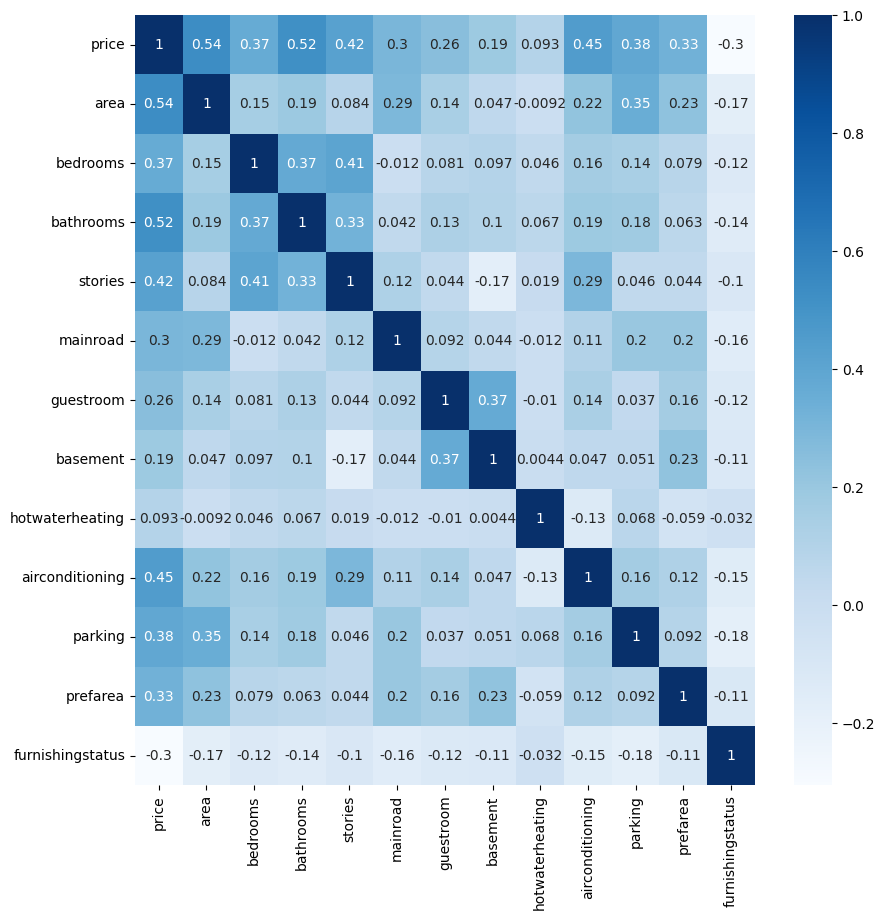

In [39]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr_relation,annot=True,cmap='Blues') #coolwarm
plt.show()
 #if the value is below 0.5 and below -0.5 then that column is inefficient to train the model

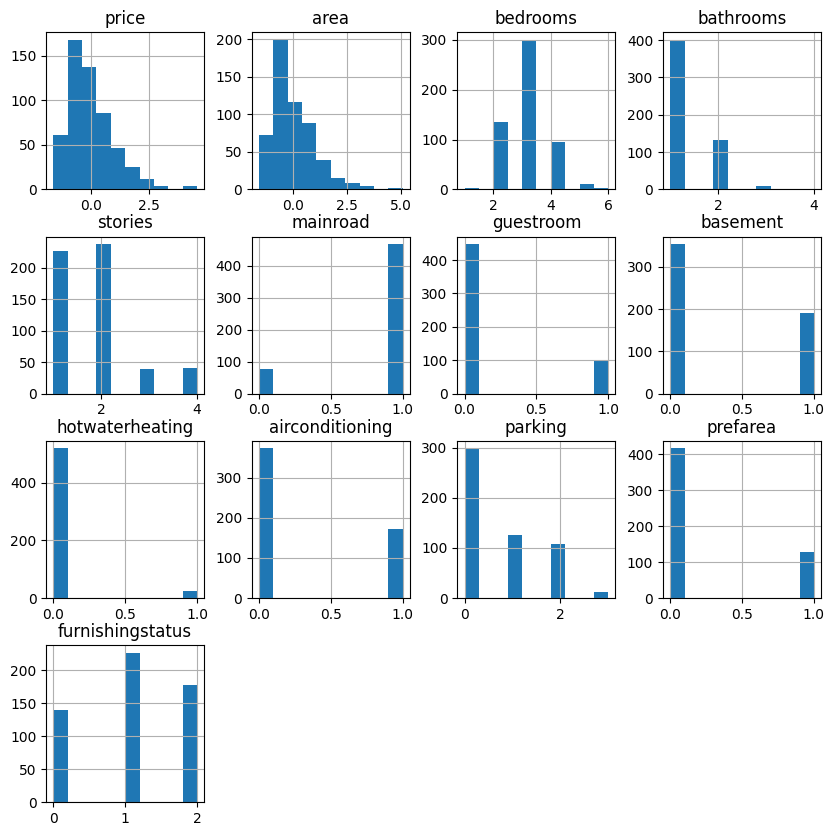

In [42]:
df.hist(figsize=(10,10),bins=10) #bins are x-axis value
plt.show()
#This is used when larger dataset with every column values in lakhs and crore values, but currently there's no problem.

Now, Let's train our model
For training, we must divide x and y values
x -> input
y -> output (output)

In [46]:
X = df.drop('price',axis=1) #axis 1 means first column should be dropped
                            #we are taking everything except price since that will be our output
y = df['price']             #store only the price

Now split train and test data

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Let's use Linear Regression since it's very based and has beginner friendly math calculations

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
#model has been trained

LinearRegression()

In [49]:
#now predict
y_predict = lr.predict(X_test)

Predicted and now metrics is calculated such as f1 score, recall, etc.

In [50]:
from sklearn.metrics import r2_score
model_accuracy = r2_score(y_test,y_predict)
model_accuracy

#0.64 -> low accuracy

0.6494754192267794